In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [4]:
def get_data(data_path):
    """Takes filepath to raw data, transforms it, and returns
    """
    df = pd.read_json(data_path)
    return df

In [5]:
data = get_data('../../data/data.json')

In [6]:
data.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [8]:
rows_with_null=data.isnull().sum()[data.isnull().sum()!=0]
print(rows_with_null)

country              81
delivery_method      16
event_published      99
has_header         5409
org_facebook         59
org_twitter          59
sale_duration       155
venue_country      1076
venue_latitude     1076
venue_longitude    1076
venue_name         1076
venue_state        1076
dtype: int64


In [9]:
data['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [10]:
data['is_fraud'] = data['acct_type'].apply(lambda x: 1 if 'fraud' in x else 0)

In [11]:
data.is_fraud.value_counts()

0    13044
1     1293
Name: is_fraud, dtype: int64

In [12]:
fraud_acc = data[data['is_fraud']==True]

In [13]:
non_fraud_acc = data[data['is_fraud']==False]

In [14]:
fraud_acc.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'is_fraud'],
      dtype='object')

In [15]:
fraud_acc.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,is_fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
26,fraudster,1299607200,870,11,US,USD,0.0,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",hotmail.com,1299171416,...,42,1295576777,3,400 Fifth Avenue,US,40.750228,-73.983714,The Setai,NY,1
51,fraudster_event,1329465600,536,6,US,USD,0.0,"<p><span style=""font-size: x-large;"">Okay ever...",cox.net,1317544696,...,77,1310957994,1,404 euclid ave,US,32.702072,-117.085088,The Jacobs Center at Market Creek,CA,1
54,fraudster,1312761600,3081,11,,GBP,0.0,"<h3><strong><strong><span style=""font-family: ...",hotmail.co.uk,1311717051,...,0,1311717050,1,Hammersmith Road,,0.000000,0.000000,Olympia Exhibition Hall,,1
70,fraudster,1322895600,0,13,US,USD,0.0,,yahoo.com,1316795942,...,0,1316795486,1,5801 Security Blvd,US,39.308752,-76.716174,,MD,1


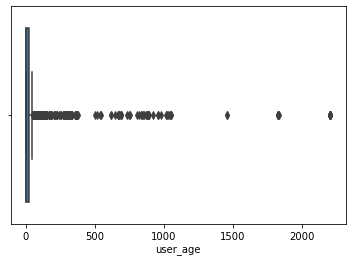

In [16]:
sns.boxplot(x="user_age", data=fraud_acc)

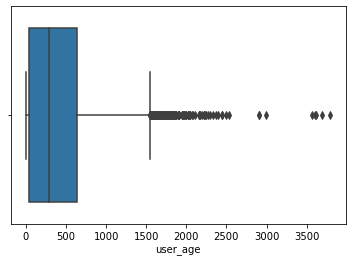

In [17]:
sns.boxplot(x="user_age", data=non_fraud_acc)

In [18]:
fraud_acc.user_age.value_counts()

0       725
1        36
2        26
5        19
18       18
       ... 
115       1
117       1
118       1
301       1
1834      1
Name: user_age, Length: 197, dtype: int64

[None]

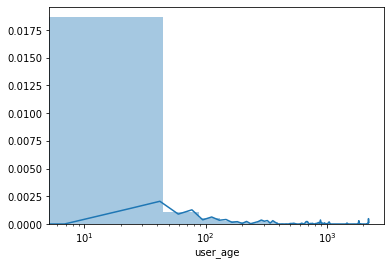

In [19]:
ax=sns.distplot(fraud_acc.user_age)
ax.set(xscale='log')

[None]

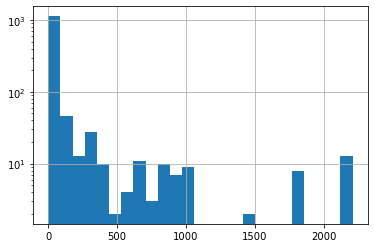

In [20]:

ax=fraud_acc.user_age.hist(bins=25)
ax.set(yscale='log')

[None]

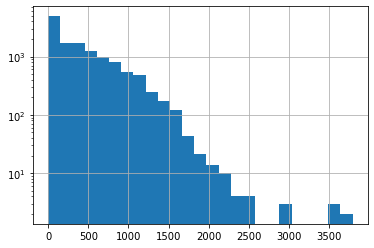

In [21]:
ax=non_fraud_acc.user_age.hist(bins=25)
ax.set(yscale='log')

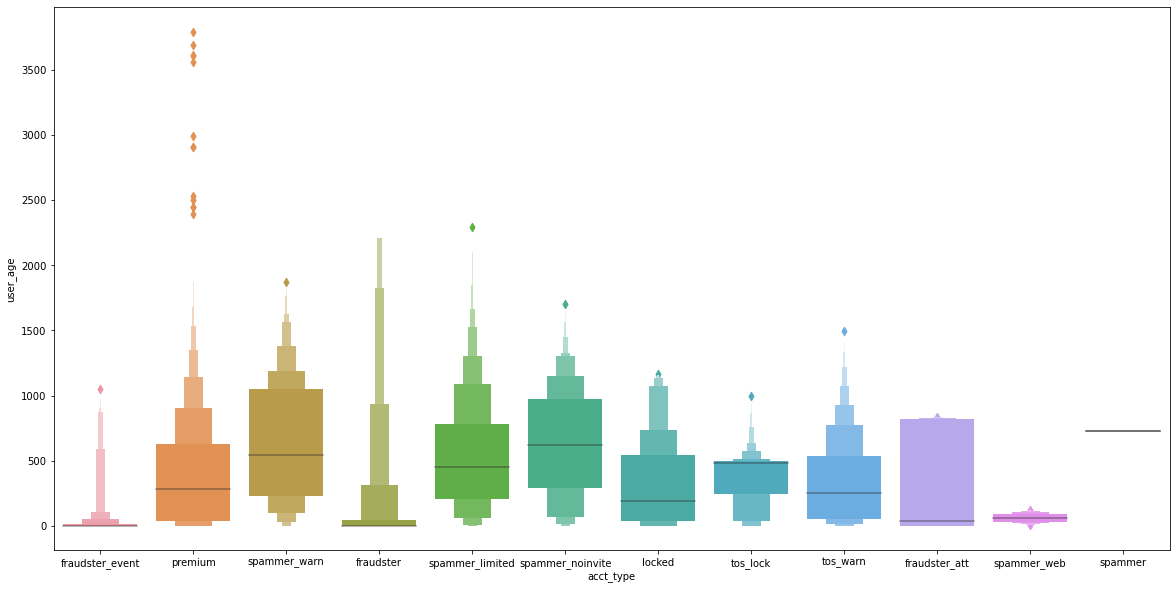

In [22]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax=sns.boxenplot(y='user_age',x="acct_type", data=data)

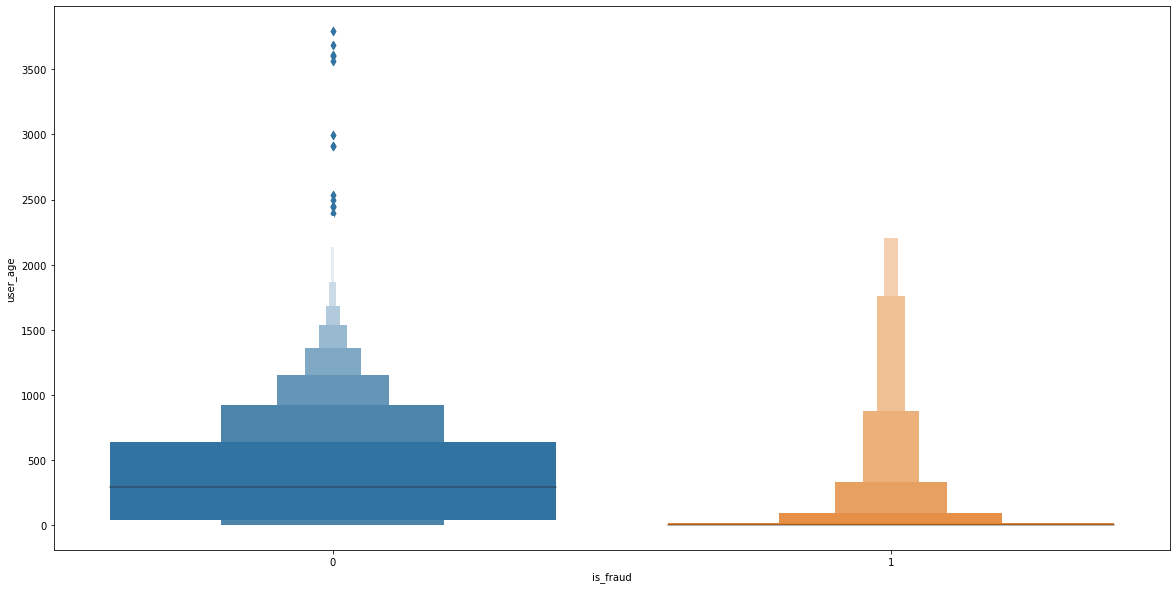

In [23]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax=sns.boxenplot(y='user_age',x="is_fraud", data=data)

In [24]:
fraud_acc.has_logo.value_counts()

1    835
0    458
Name: has_logo, dtype: int64

In [25]:
non_fraud_acc.has_logo.value_counts()

1    11238
0     1806
Name: has_logo, dtype: int64

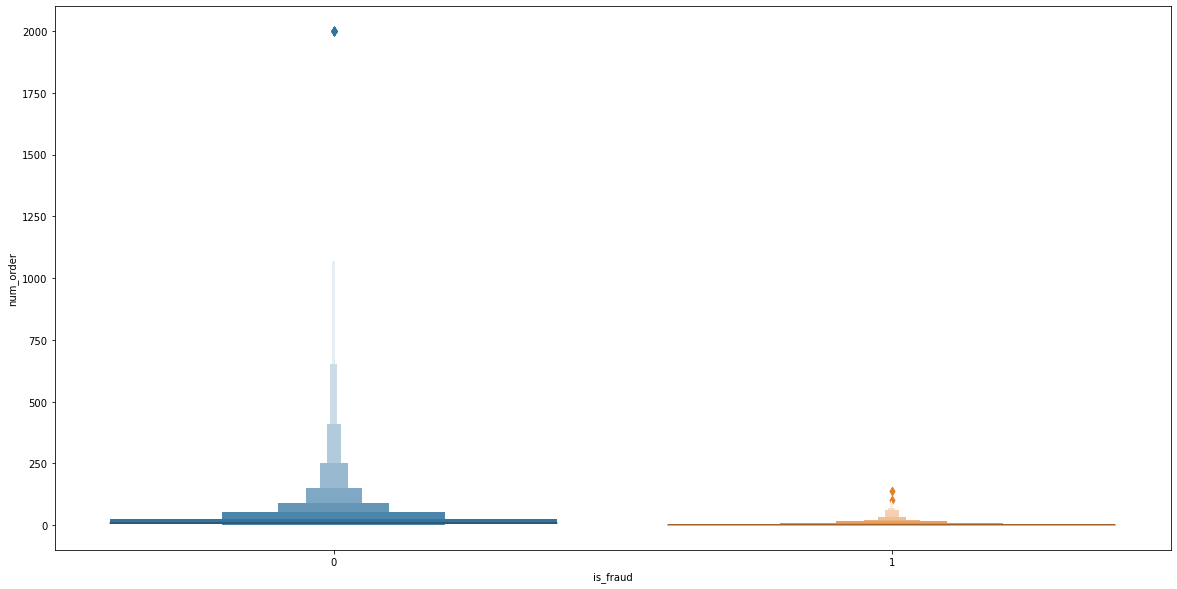

In [26]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax=sns.boxenplot(y='num_order',x="is_fraud", data=data)

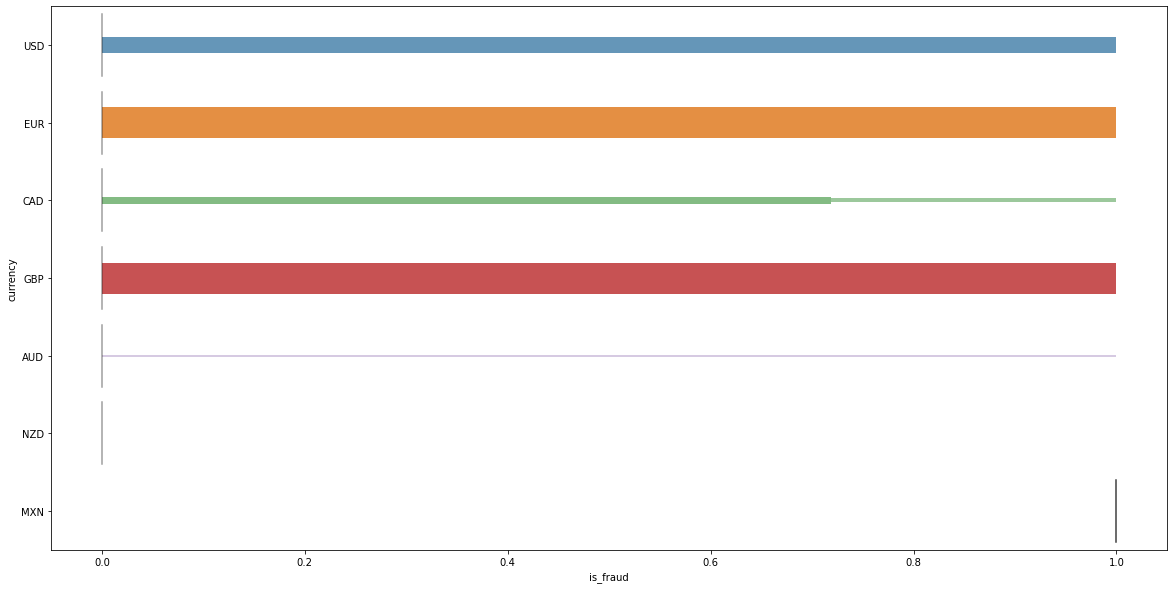

In [27]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax=sns.boxenplot(y='currency',x="is_fraud", data=data)

In [28]:
non_fraud_acc.currency.value_counts()

USD    8838
GBP    1879
CAD    1280
AUD     767
EUR     225
NZD      55
Name: currency, dtype: int64

In [29]:
fraud_acc.currency.value_counts()

USD    858
GBP    343
CAD     42
EUR     37
AUD     12
MXN      1
Name: currency, dtype: int64

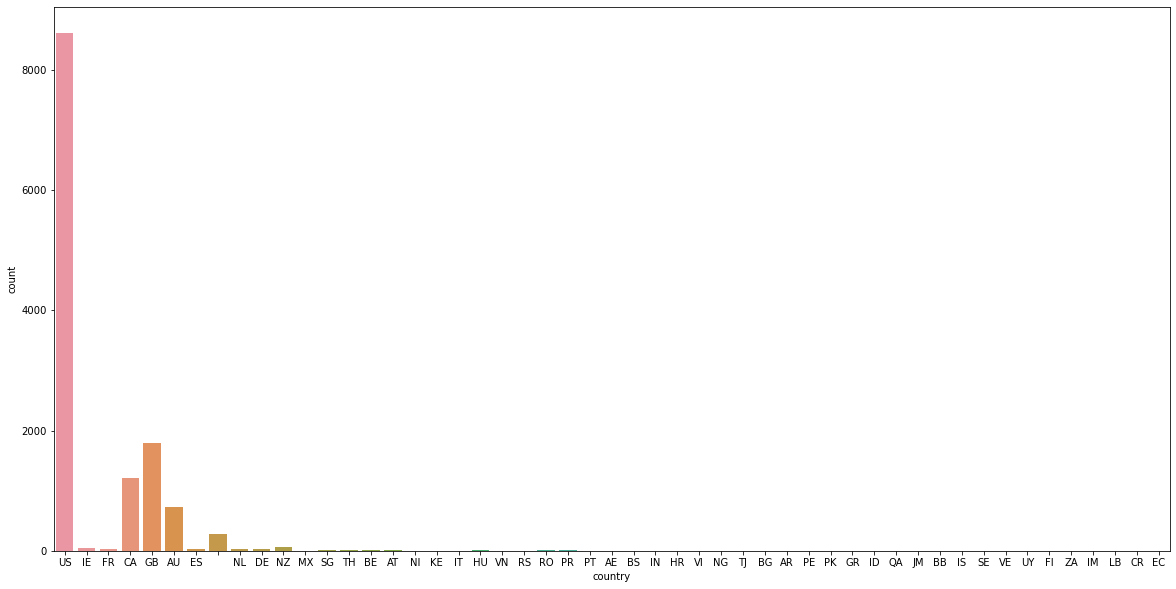

In [30]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax=sns.countplot(x='country', data=non_fraud_acc)

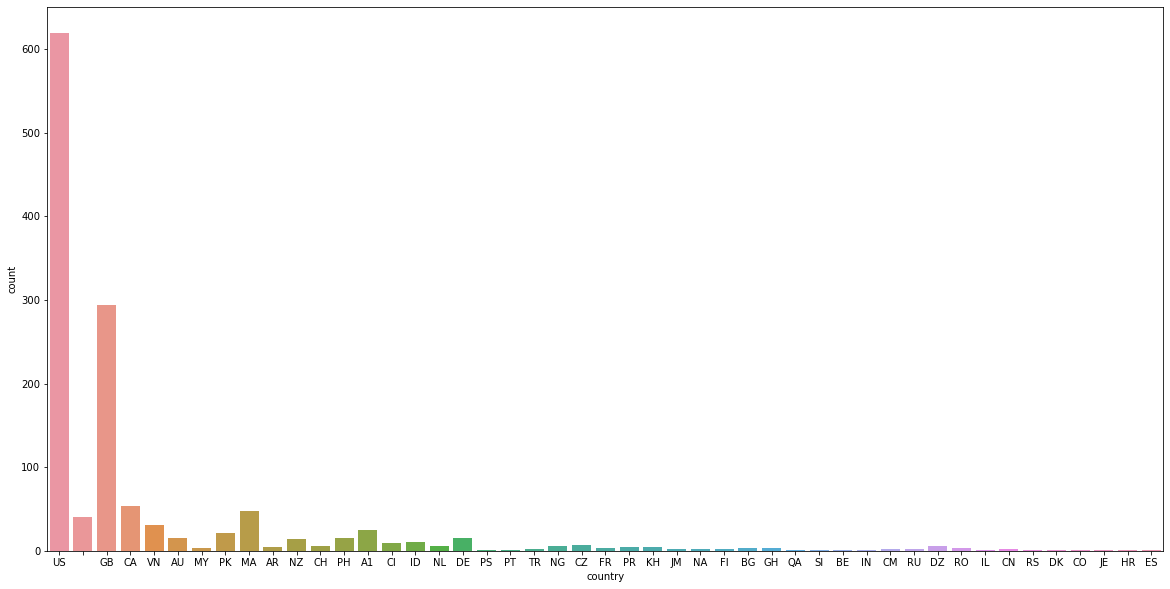

In [31]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax=sns.countplot(x='country', data=fraud_acc)

[None]

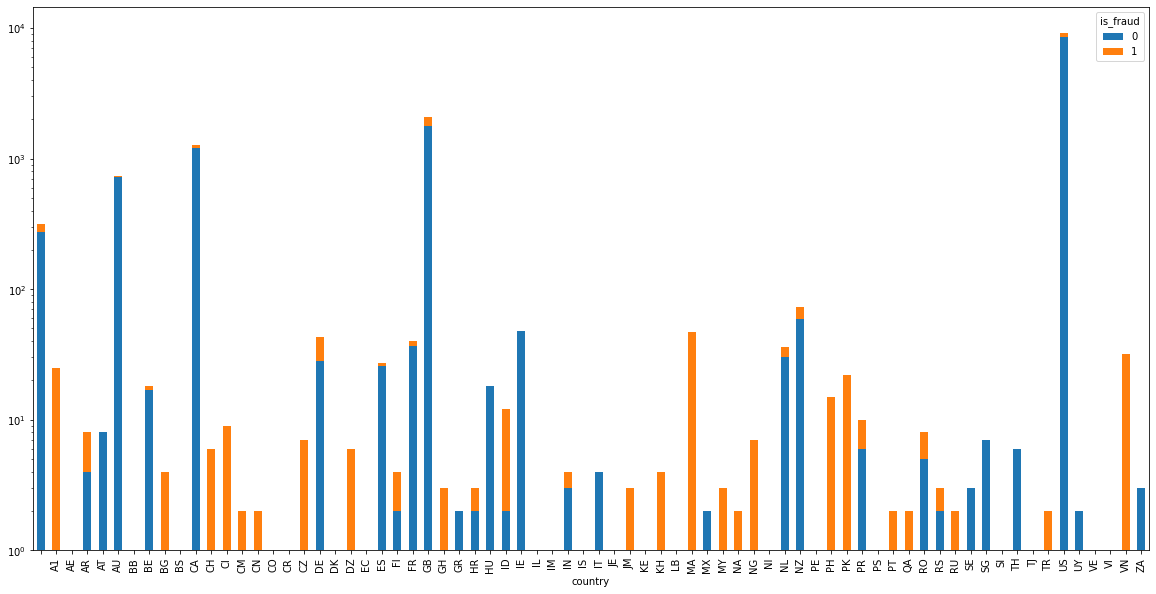

In [32]:
#fig, ax = plt.subplots(1,1, figsize=(20,10))
#ax=sns.plot(x='country', hue='is_fraud',data=data, stacked=True)
df_plot = data.groupby(['country', 'is_fraud']).size().reset_index().pivot(columns='is_fraud', index='country', values=0)
ax = df_plot.plot(kind='bar', stacked=True, figsize=(20,10))
ax.set(yscale='log')

In [33]:
data.corr()['is_fraud'][np.argsort(abs(data.corr()['is_fraud']))]

event_created        -0.006436
venue_latitude        0.010126
gts                  -0.017875
object_id             0.026721
event_end            -0.042553
approx_payout_date   -0.042553
event_start          -0.044995
venue_longitude       0.066057
show_map             -0.076217
event_published      -0.077322
num_order            -0.078008
has_header           -0.082101
num_payouts          -0.083433
has_analytics        -0.084626
fb_published         -0.099143
body_length          -0.118308
name_length          -0.158447
channels             -0.165358
has_logo             -0.169485
sale_duration        -0.179512
sale_duration2       -0.179550
org_facebook         -0.181792
user_created          0.184360
delivery_method      -0.194046
org_twitter          -0.205692
user_type            -0.213911
user_age             -0.215929
is_fraud              1.000000
Name: is_fraud, dtype: float64

In [34]:
cols=list((data.corr()[abs(data.corr()['is_fraud'])>0.07][['is_fraud']]).index)
cols

['body_length',
 'channels',
 'delivery_method',
 'event_published',
 'fb_published',
 'has_analytics',
 'has_header',
 'has_logo',
 'name_length',
 'num_order',
 'num_payouts',
 'org_facebook',
 'org_twitter',
 'sale_duration',
 'sale_duration2',
 'show_map',
 'user_age',
 'user_created',
 'user_type',
 'is_fraud']

Text(0.5, 1.0, 'Correlation betwen columns')

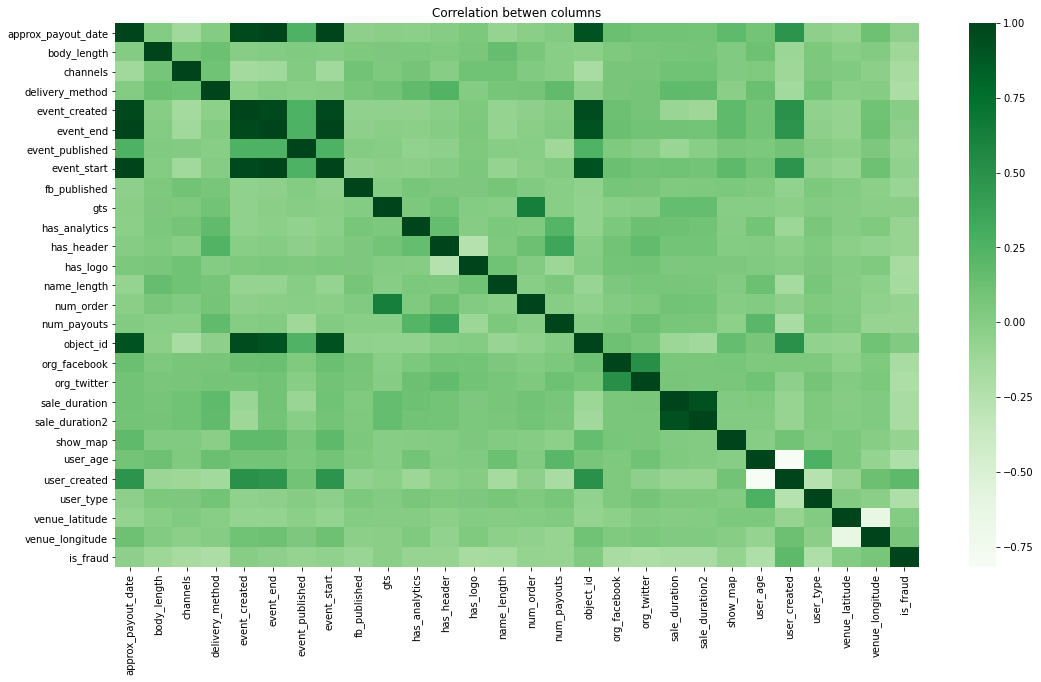

In [35]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),cmap='Greens',annot=False)
plt.title('Correlation betwen columns')

In [36]:
data[['event_created', 
        'event_end', 
        'event_published', 
        'event_start']]

,event_created,event_end,event_published,event_start
0,1262739706,1265630400,1.263110e+09,1265594400
1,1293832670,1296288000,1.293833e+09,1296255600
2,1291090956,1295740800,1.291092e+09,1295713800
3,1360681570,1388534400,1.360683e+09,1360702800
4,1291994666,1297468800,1.291995e+09,1297440000
...,...,...,...,...
14332,1360297993,1361257200,1.360299e+09,1361232000
14333,1360367042,1365134400,1.360370e+09,1365123600
14334,1360600330,1368349200,1.361337e+09,1368327600
14335,1360376285,1360929600,1.360377e+09,1360890000


PCA

In [37]:
simple_PCA = PCA(n_components=5)

In [38]:
#simple_PCA.fit(data)

Keeping only numerical values

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

### Random Forest

In [40]:
data_model=data[cols]

In [41]:
data_model.has_header.value_counts()

0.0    7124
1.0    1804
Name: has_header, dtype: int64

In [42]:
data_model.columns

Index(['body_length', 'channels', 'delivery_method', 'event_published',
       'fb_published', 'has_analytics', 'has_header', 'has_logo',
       'name_length', 'num_order', 'num_payouts', 'org_facebook',
       'org_twitter', 'sale_duration', 'sale_duration2', 'show_map',
       'user_age', 'user_created', 'user_type', 'is_fraud'],
      dtype='object')

In [43]:
data_model=data_model.drop('has_header',axis=1)

In [44]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   body_length      14337 non-null  int64  
 1   channels         14337 non-null  int64  
 2   delivery_method  14321 non-null  float64
 3   event_published  14238 non-null  float64
 4   fb_published     14337 non-null  int64  
 5   has_analytics    14337 non-null  int64  
 6   has_logo         14337 non-null  int64  
 7   name_length      14337 non-null  int64  
 8   num_order        14337 non-null  int64  
 9   num_payouts      14337 non-null  int64  
 10  org_facebook     14278 non-null  float64
 11  org_twitter      14278 non-null  float64
 12  sale_duration    14182 non-null  float64
 13  sale_duration2   14337 non-null  int64  
 14  show_map         14337 non-null  int64  
 15  user_age         14337 non-null  int64  
 16  user_created     14337 non-null  int64  
 17  user_type   

In [45]:
data_model

,body_length,channels,delivery_method,event_published,fb_published,has_analytics,has_logo,name_length,num_order,num_payouts,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,is_fraud
0,3852,5,0.0,1.263110e+09,0,0,0,60,0,0,0.0,0.0,29.0,33,1,36,1259613950,1,1
1,3499,0,1.0,1.293833e+09,0,0,1,27,23,1,0.0,12.0,28.0,28,0,149,1280942776,3,0
2,2601,8,1.0,1.291092e+09,0,0,0,28,19,4,0.0,0.0,54.0,54,0,214,1272559388,3,0
3,12347,6,1.0,1.360683e+09,0,0,1,21,39,16,0.0,0.0,0.0,0,0,889,1283870102,3,0
4,2417,11,0.0,1.291995e+09,1,0,0,66,30,0,0.0,0.0,63.0,63,0,35,1288984065,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,667,0,0.0,1.360299e+09,0,0,1,27,0,0,0.0,0.0,11.0,11,1,0,1360297993,1,1
14333,5812,5,1.0,1.360370e+09,0,0,0,42,33,4,0.0,0.0,55.0,55,1,1374,1241625346,4,0
14334,557,13,0.0,1.361337e+09,1,0,1,67,1,0,0.0,0.0,81.0,89,1,84,1353386971,4,0
14335,10873,8,0.0,1.360377e+09,0,0,1,54,2,101,0.0,0.0,6.0,6,1,812,1290204991,3,0


In [46]:
data_model=data_model.dropna()

In [121]:
X = data_model.drop('is_fraud', axis =1)
y = data_model['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15,test_size=0.2, stratify = y)

In [122]:
y_test

4659     0
14064    0
8679     0
6164     0
10301    0
        ..
2632     0
8880     0
7103     0
12169    0
6846     0
Name: is_fraud, Length: 2827, dtype: int64

In [126]:
rf = RandomForestClassifier(n_estimators=687, max_features=4, max_depth=50) # n_estimators=687, max_features=4, max_depth=50
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=4, n_estimators=687)

In [127]:
y_pred=rf.predict(X_test)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2601
           1       0.88      0.80      0.84       226

    accuracy                           0.98      2827
   macro avg       0.93      0.90      0.91      2827
weighted avg       0.97      0.98      0.97      2827



In [130]:
confusion_matrix(y_test, y_pred)

array([[2576,   25],
       [  45,  181]])

In [53]:
def confmat(true_labels, predicted_labels, columns, colour ='magma_r', size = (14,7)):
    """
    confmat: creates a confusion matrix from the true_labels and predicted_labels
    """
    cm = confusion_matrix(true_labels, predicted_labels) 
    cm_df = pd.DataFrame(cm,
    index = [col for col in columns], 
    columns = [col for col in columns])
    fig=plt.figure(figsize=(14,10))
    sns.heatmap(cm_df, annot = True, fmt='g', linewidths=.2)
    plt.title('Confusion Matrix', fontsize = 20)
    plt.ylabel('True label', fontsize = 18)
    plt.xlabel('Predicted label', fontsize = 18)
    plt.tick_params(axis='both', labelsize=14)
    plt.show()
    return fig

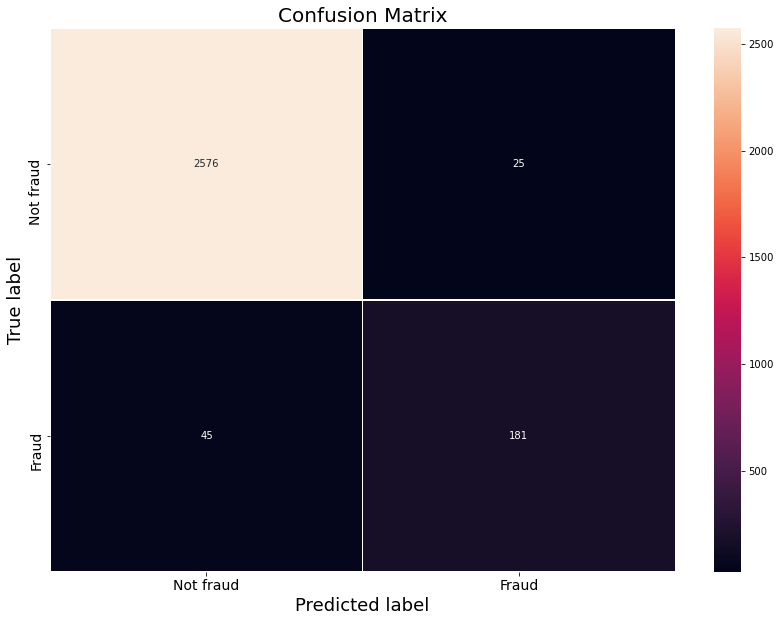

In [132]:
ax=confmat(y_test, y_pred,['Not fraud', 'Fraud'])

### Random Search and Grid Search

In [85]:
def rand_grid_search(X, y):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 5, stop = 1000, num = 10)]
    # Number of features to consider at every split
    max_features = [i for i in range(1,len(X.columns))]
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 4, 6]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 3]
    # Method of selecting samples for training each tree
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -2, scoring='recall')
    # Fit the random search model
    rf_random.fit(X, y)
    return rf_random.best_estimator_

In [83]:
rand_grid_search(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:  6.0min finished


RandomForestClassifier(max_depth=50, max_features=4, n_estimators=668)

In [95]:
def grid_search(X, y):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start =650, stop = 700, num = 5)]
    # Number of features to consider at every split
    max_features = [int(x) for x in np.linspace(4, 10, num = 5)]
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(40, 80, num = 5)]
    #max_depth.append(None)
    # Method of selecting samples for training each tree
    param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth}
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    grid_random = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 4, verbose=2, n_jobs = -2, scoring='recall')
    # Fit the random search model
    grid_random.fit(X, y)
    return grid_random.best_estimator_, grid_random.best_score_

In [96]:
grid_search(X_train, y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-2)]: Done 343 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed: 12.1min finished


(RandomForestClassifier(max_depth=50, max_features=4, n_estimators=687),
 0.7825620833495771)

### Gradient Boosting

In [142]:
def rand_grid_search_grb(X, y):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 10)]
    # Number of features to consider at every split
    max_features = [i for i in range(1,len(X.columns))]
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(1, 15, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    learning_rate = [0.1, 0.01, 0.02]
    # Method of selecting samples for training each tree
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'learning_rate': learning_rate}
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    grb = GradientBoostingClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    grb_random = RandomizedSearchCV(estimator = grb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -2, scoring='recall')
    # Fit the random search model
    grb_random.fit(X, y)
    return grb_random.best_estimator_ , grb_random.best_score_

In [143]:
rand_grid_search_grb(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed: 19.5min finished


(GradientBoostingClassifier(max_depth=5, max_features=7, n_estimators=833),
 0.7869757174392936)

In [153]:
def grid_search_grb(X, y):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 750, stop = 835, num = 5)]
    # Number of features to consider at every split
    max_features = [int(x) for x in np.linspace(7, 10, num = 2)]
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(5, 10, num = 3)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    learning_rate = [0.01, 0.05, 0.2]
    # Method of selecting samples for training each tree
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'learning_rate': learning_rate}
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    grb = GradientBoostingClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    grb_grid = GridSearchCV(estimator = grb, param_grid = random_grid, cv = 4, verbose=2, n_jobs = -2, scoring='recall')
    # Fit the random search model
    grb_grid.fit(X, y)
    return grb_grid.best_estimator_, grb_grid.best_score_

In [154]:
grid_search_grb(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-2)]: Done 343 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-2)]: Done 480 out of 480 | elapsed: 30.2min finished


(GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features=10,
                            n_estimators=771),
 0.7903103192857979)

In [160]:
#grb = GradientBoostingClassifier(n_estimators=750, learning_rate=0.02, max_depth=4)

In [165]:
grb = GradientBoostingClassifier(n_estimators=771, learning_rate=0.2, max_depth=5, max_features=10)

In [166]:
grb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features=10,
                           n_estimators=771)

In [167]:
y_grb=grb.predict(X_test)

In [168]:
print(classification_report(y_test, y_grb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2601
           1       0.87      0.81      0.84       226

    accuracy                           0.98      2827
   macro avg       0.93      0.90      0.91      2827
weighted avg       0.97      0.98      0.97      2827



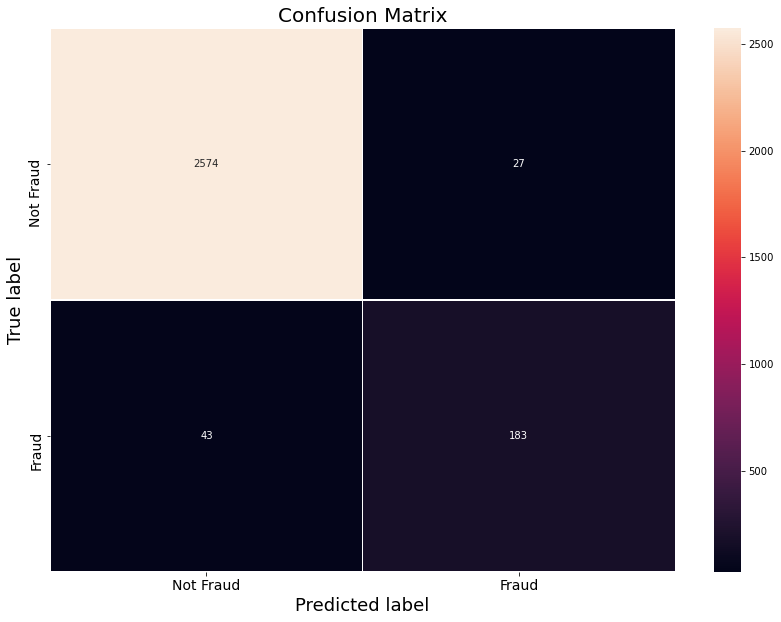

In [169]:
ax=confmat(y_test, y_grb,['Not Fraud', 'Fraud'])

In [170]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr_grb, tpr_grb, thresholds_grb = roc_curve(y_test, y_grb)

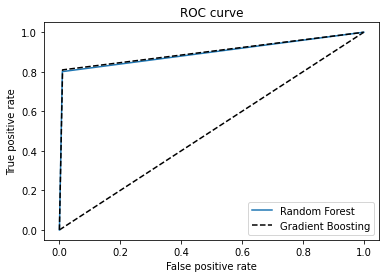

In [171]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.plot(fpr_grb, tpr_grb, 'k--', label='Gradient Boosting')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')